In [89]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

In [90]:
# Function to display synthetic data
def display_data(adc_measurements, quantity, quantity_label, title):
    plt.scatter(adc_measurements, quantity, marker='o', color='blue')
    plt.title(title)
    plt.xlabel('ADC Output (0 - 4095)')
    plt.ylabel(quantity_label)
    plt.xlim(min(adc_measurements), max(adc_measurements))
    plt.ylim(min(quantity), max(quantity))
    plt.grid()
    # plt.tight_layout()
    plt.show()


In [ ]:
# This function writes the data to a CSV file
def store_data_to_csv(file_name, x_data, y_data, header=['ADC Measurements', 'Quantity'], folder_name='csv', rounding_n_decimals=1):
    """
    Store data to a CSV file.

    Parameters:
    - file_name: Name of the CSV file.
    - x_data: Data for the x-axis (ADC measurements).
    - y_data: Data for the y-axis (quantity).
    - header: Header for the CSV file.
    - folder_name: Folder to store the CSV file.
    - rounding_n_decimals: Number of decimal places to round the data.
    """
    # Create the folder if it doesn't exist
    os.makedirs(folder_name, exist_ok=True)

    with open(os.path.join(folder_name, file_name), mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
        for x, y in zip(x_data, y_data):
            if rounding_n_decimals is not None:
                x = round(x, rounding_n_decimals)
                y = round(y, rounding_n_decimals)
            writer.writerow([x, y])

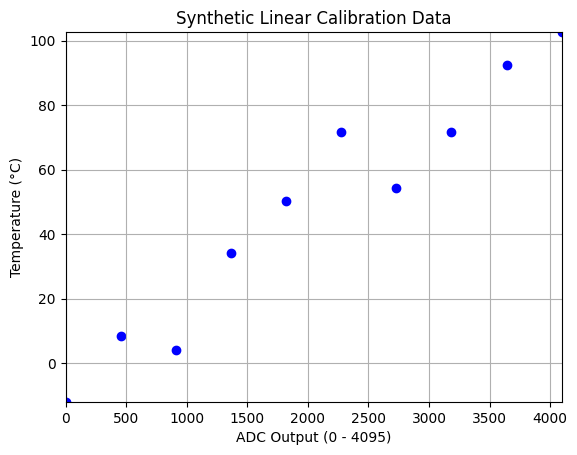

In [ ]:
# Synthesize linear calibration data
def synthesize_linear_calibration_data(adc_max = 4095, slope = 10, offset = 0, n_points=10, noise_level=0.1):
    """
    Synthesize linear calibration data with additive guassian white noise. Assumes full range of ADC values is used and a linear relationship between ADC value and measured quantity (e.g. temperature).

    Parameters:
    adc_max (int): Maximum ADC value.
    slope (float): Slope of the linear relationship.
    offset (float): Offset of the linear relationship.
    n_points (int): Number of data points to generate.
    noise_level (float): Standard deviation of the Gaussian noise.

    Returns:
    tuple: Two numpy arrays representing the ADC values and the corresponding measured quantity (e.g. temperature).
    """

    x = np.linspace(0, adc_max, n_points)
    y = slope * x + offset + np.random.normal(0, noise_level, n_points) 
    return x, y

adc, temperature = synthesize_linear_calibration_data(noise_level=10,slope=0.024, offset=0)
display_data(adc, temperature, "Temperature (°C)", 'Synthetic Linear Calibration Data')

store_data_to_csv('temperature_calibration.csv', adc, temperature, header=['ADC Measurements', 'Temperature (degrees Celsius)'], folder_name='csv')


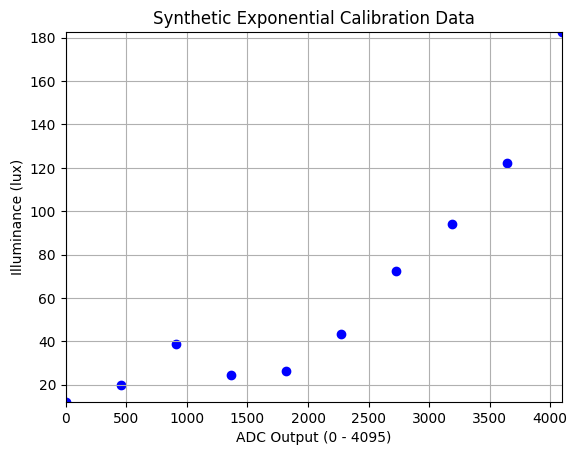

In [109]:
# Synthesize exponential calibration data
def synthesize_exponential_calibration_data(adc_max = 4095, a = 1, b = 0.01, n_points=10, noise_level=0.1):
    """
    Synthesize exponential data with additive guassian white noise. Assumes full range of ADC values is used and a exponential relationship between ADC value and measured quantity (e.g. photoresistor).
    
    Parameters:
    adc_max (int): Maximum ADC value.
    a (float): Coefficient for the exponential function.
    b (float): Exponent for the exponential function.
    n_points (int): Number of data points to generate.
    noise_level (float): Standard deviation of Gaussian noise.
    
    Returns:
    tuple: Two numpy arrays representing the x and y values of the calibration data.
    """
    x = np.linspace(0, adc_max, n_points)
    y = a * np.exp(b * x) + np.random.normal(0, noise_level, n_points)
    return x, y

adc, light_intensity = synthesize_exponential_calibration_data(noise_level=10, a=10, b=0.0007)
display_data(adc, light_intensity, "Illuminance (lux)", 'Synthetic Exponential Calibration Data')

store_data_to_csv('light_intensity_calibration.csv', adc, light_intensity, header=['ADC Measurements', 'Light Intensity (lux)'], folder_name='csv')